In [4]:
pip install -U pytesseract

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pytesseract

In [2]:
dir(pytesseract)

['ALTONotSupported',
 'Output',
 'TSVNotSupported',
 'TesseractError',
 'TesseractNotFoundError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'get_languages',
 'get_tesseract_version',
 'image_to_alto_xml',
 'image_to_boxes',
 'image_to_data',
 'image_to_osd',
 'image_to_pdf_or_hocr',
 'image_to_string',
 'pytesseract',
 'run_and_get_output']

In [35]:
from PIL import Image

import pytesseract

# If you don't have tesseract executable in your PATH, include the following:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
# Example tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract'

filepath = './Downloads/pytesseract-master/pytesseract-master/tests/data/'

# Simple image to string
print(pytesseract.image_to_string(Image.open(filepath+'test.png')))

# In order to bypass the image conversions of pytesseract, just use relative or absolute image path
# NOTE: In this case you should provide tesseract supported images or tesseract will return error
print(pytesseract.image_to_string(filepath+'test.png'))

# List of available languages
print(pytesseract.get_languages(config=''))

# French text image to string
# print(pytesseract.image_to_string(Image.open(filepath+'test-european.jpg'), lang='fra'))

# Batch processing with a single file containing the list of multiple image file paths
# print(pytesseract.image_to_string(filepath+'images.txt'))

# Timeout/terminate the tesseract job after a period of time
try:
    print(pytesseract.image_to_string(filepath+'test.jpg', timeout=2)) # Timeout after 2 seconds
    print(pytesseract.image_to_string(filepath+'test.jpg', timeout=0.5)) # Timeout after half a second
except RuntimeError as timeout_error:
    # Tesseract processing is terminated
    pass

# Get bounding box estimates
print(pytesseract.image_to_boxes(Image.open(filepath+'test.png')))

# Get verbose data including boxes, confidences, line and page numbers
print(pytesseract.image_to_data(Image.open(filepath+'test.png')))

# Get information about orientation and script detection
print(pytesseract.image_to_osd(Image.open(filepath+'test.png')))

# Get a searchable PDF
pdf = pytesseract.image_to_pdf_or_hocr(filepath+'test.png', extension='pdf')
with open(filepath+'test.pdf', 'w+b') as f:
    f.write(pdf) # pdf type is bytes by default

# Get HOCR output
hocr = pytesseract.image_to_pdf_or_hocr(filepath+'test.png', extension='hocr')

# Get ALTO XML output
xml = pytesseract.image_to_alto_xml(filepath+'test.png')

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.

['eng', 'kor', 'osd']
This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 10.86
Script: Latin
Script confidence: 10.56



In [2]:
import cv2

In [3]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

In [4]:
def makeim(name, image):
    cv2.imshow(name, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
from PIL import Image

In [19]:
config = ('-l kor+eng --oem 3 --psm 4')
im = cv2.imread('./medicine_image/195900001.jpg')
makeim('original', im)
print(pytesseract.image_to_string(im, config=config))

print("=======음영처리==================")
makeim('gray scale', img_gray)
img_gray=cv2.imread('./medicine_image/195900001.jpg', cv2.IMREAD_GRAYSCALE)
print(pytesseract.image_to_string(img_gray, config=config))

10

ㅁ
| 이

10
i | mm)

Co
CNG» SEND

rmation Center

=======음영처리==================
약 학 정 보 원

Korea Pharmaceutical Inf

ation Center



In [51]:
config = ('-l kor+eng')
img = cv2.imread('./medicine_image/195900001.jpg')
makeim('original', img)
text = pytesseract.image_to_string(img, config=config)
print(text)


img_gray = cv2.imread('./medicine_image/195900001.jpg', cv2.IMREAD_GRAYSCALE)
makeim('original', img_gray)
text = pytesseract.image_to_string(img_gray, config=config)
print(text)

CREA 가 비 셔 에 이아
— , ㅣ , ~

Korea Pharmaceutical

rmation Center

CKD

약 학 정 보 원

Korea Pharmaceutical Inf

ation Center



In [79]:
config = '-l kor+eng --oem 3 --psm 4'
path = './Downloads/123/Colab Notebooks/pills_test_no_bg/ver2'
filename = '1350.jpg'
img = cv2.imread(path+filename)
# img = cv2.imread(path+filename, cv2.IMREAD_GRAYSCALE)
# text = pytesseract.image_to_string(img, lang='kor+eng')
text = pytesseract.image_to_string(img, config=config)
print(text)
makeim('wtf', img)

> 사 품 의 막 품 안 전 저
MRistiy af food aad Sue Safety



In [6]:
import matplotlib.pyplot as plt

In [137]:
dir(cv2)

['ACCESS_FAST',
 'ACCESS_MASK',
 'ACCESS_READ',
 'ACCESS_RW',
 'ACCESS_WRITE',
 'ADAPTIVE_THRESH_GAUSSIAN_C',
 'ADAPTIVE_THRESH_MEAN_C',
 'AGAST_FEATURE_DETECTOR_AGAST_5_8',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12D',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12S',
 'AGAST_FEATURE_DETECTOR_NONMAX_SUPPRESSION',
 'AGAST_FEATURE_DETECTOR_OAST_9_16',
 'AGAST_FEATURE_DETECTOR_THRESHOLD',
 'AKAZE',
 'AKAZE_DESCRIPTOR_KAZE',
 'AKAZE_DESCRIPTOR_KAZE_UPRIGHT',
 'AKAZE_DESCRIPTOR_MLDB',
 'AKAZE_DESCRIPTOR_MLDB_UPRIGHT',
 'AKAZE_create',
 'AffineFeature',
 'AffineFeature_create',
 'AgastFeatureDetector',
 'AgastFeatureDetector_AGAST_5_8',
 'AgastFeatureDetector_AGAST_7_12d',
 'AgastFeatureDetector_AGAST_7_12s',
 'AgastFeatureDetector_NONMAX_SUPPRESSION',
 'AgastFeatureDetector_OAST_9_16',
 'AgastFeatureDetector_THRESHOLD',
 'AgastFeatureDetector_create',
 'Algorithm',
 'AlignExposures',
 'AlignMTB',
 'AsyncArray',
 'BFMatcher',
 'BFMatcher_create',
 'BORDER_CONSTANT',
 'BORDER_DEFAULT',
 'BORDER_ISOLATED',
 'B

In [29]:
config = '-l kor+eng --oem 3 --psm 3'
path = './Downloads/123/Colab Notebooks/pills_test_no_bg/'
filename = '1035.jpg'
# img = cv2.imread(path+filename)
img = cv2.imread(path+filename, cv2.IMREAD_GRAYSCALE) # gray
# img = cv2.GaussianBlur(img, (5,5,), 0) # blurred
img = cv2.fastNlMeansDenoising(img, None, 10, 7, 21)
img = cv2.Canny(img, 75, 200) # edged
img = img[25:-75]

# text = pytesseract.image_to_string(img, lang='kor+eng')
text = pytesseract.image_to_string(img, config=config)
print(text)
makeim('wtf', img)

In [174]:
(len(img)/2)

213.0

In [137]:
for i in range(4):
    for j in range(12):
        config = '-l eng+kor --oem {} --psm {}'.format(i,j)
        path = './Downloads/123/Colab Notebooks/pills_test_no_bg/'
        filename = '1024.jpg'
        img = cv2.imread(path+filename, cv2.IMREAD_GRAYSCALE)
#         img = cv2.GaussianBlur(img, (5,5,), 0) # blurred
#         img = cv2.Canny(img, 75, 200) # edged
        img = cv2.fastNlMeansDenoising(img, None, 15, 7, 21)
        img = img[25:-75]
        try:
            text = pytesseract.image_to_string(img, config=config)
            print(text)
            print('oem: {}, psm: {}'.format(i,j))
        except:
            print('set of oem: {}, psm: {} raise error'.format(i,j))


set of oem: 0, psm: 0 raise error
7 0×6【륵:8 애0_^
10m9

oem: 0, psm: 1
set of oem: 0, psm: 2 raise error
7 0×6【륵:8 애0_^
10m9

oem: 0, psm: 3
7 0×6【륵:8 애0_^
10m9

oem: 0, psm: 4
. ^
0
니:
「)

m9
폐

oem: 0, psm: 5
7 0×6【륵:8 애0_^
10m9

oem: 0, psm: 6
:낮 딕숑흙필딥 애야 〉

oem: 0, psm: 7
 (필숑얕헬`필큭륙(:뉴|0~^

oem: 0, psm: 8
 (필숑얕헬`필큭륙(:뉴|0~^

oem: 0, psm: 9

oem: 0, psm: 10
_

oem: 0, psm: 11
set of oem: 1, psm: 0 raise error
Oxetine CHO-A
10mg

oem: 1, psm: 1
set of oem: 1, psm: 2 raise error
Oxetine CHO-A
10mg

oem: 1, psm: 3
Oxetine CHO-A
10mg

oem: 1, psm: 4
i 5
fe)
-
rs)

22
[

oem: 1, psm: 5
Oxetine CHO-A
10mg

oem: 1, psm: 6
ㅇ 9800 007

oem: 1, psm: 7
a

oem: 1, psm: 8
12

oem: 1, psm: 9
12

oem: 1, psm: 10
es

oem: 1, psm: 11
set of oem: 2, psm: 0 raise error
： 0%646_。. (0-&
1009

oem: 2, psm: 1
set of oem: 2, psm: 2 raise error
： 0%646_。. (0-&
1009

oem: 2, psm: 3
： 0%646_。. (0-&
1009

oem: 2, psm: 4
. ^
으
쾌
ㅇ

으 렐
폐

oem: 2, psm: 5
： 0%646_。. (0-&
1009

oem: 2, psm: 6
| 80 . 010 〉

oem: 2, p

In [11]:
pip install -U imutils

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
import matplotlib.pyplot as plt

def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

4
0 7
1 7
2 7
3 2


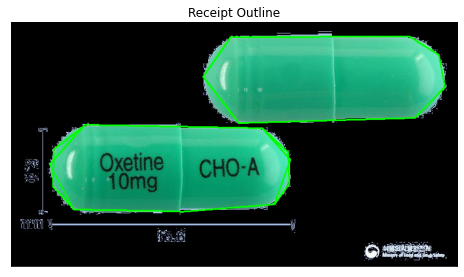

In [31]:
import imutils

path = './Downloads/123/Colab Notebooks/pills_test_no_bg/ver2/'
filename = '1024.jpg'
# img = cv2.imread(path+filename)
img = cv2.imread(path+filename, cv2.IMREAD_GRAYSCALE) # gray
img = cv2.GaussianBlur(img, (15,15,), 0) # blurred
# img = cv2.fastNlMeansDenoising(img, None, 10, 7, 21)
img = cv2.Canny(img, 75, 200) # edged
img = img[:-75]




# contours를 찾아 크기순으로 정렬
cnts = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

receiptCnt = list()

# 정렬된 contours를 반복문으로 수행하며 4개의 꼭지점을 갖는 도형을 검출
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
    # contours가 크기순으로 정렬되어 있기때문에 제일 첫번째 사각형을 영수증 영역으로 판단하고 break
    receiptCnt.append(approx)
 
print(len(receiptCnt))
 
# 만약 추출한 윤곽이 없을 경우 오류
if receiptCnt is None:
    raise Exception(("Could not find receipt outline."))
    
output = cv2.imread(path+filename).copy()
pill_img = list()
for i, Cnt in enumerate(receiptCnt):
    print(i, len(Cnt))
    cv2.drawContours(output, [Cnt], -1, (0, 255, 0), 2)
    v = np.r_[min(receiptCnt[0], key = lambda x:x[0][0])[0],max(receiptCnt[0], key = lambda x:x[0][0])[0]]
    pill_img.append(cv2.imread(path+filename, cv2.IMREAD_GRAYSCALE)[v[0]:v[2],v[1]:v[3]])
    
plt_imshow("Receipt Outline", output)

In [9]:
import numpy as np

In [20]:
len(cnts[0])

402

In [44]:
np.r_[max(receiptCnt[0], key = lambda x:x[0][0]),max(receiptCnt[0], key = lambda x:x[0][0])]

array([[1029,  222],
       [1029,  222]], dtype=int32)

In [42]:
np.r_[receiptCnt[0][0][0],receiptCnt[0][0][0]]

array([808, 177, 808, 177], dtype=int32)

In [34]:
def cut(filename, path=None, n=2, show=False):
    img = cv2.imread(path+filename, cv2.IMREAD_GRAYSCALE) # gray
    img = cv2.GaussianBlur(img, (15,15,), 0) # blurred
    img = cv2.Canny(img, 75, 200) # edged
    img = img[:-75]
    
    # contours를 찾아 크기순으로 정렬
    cnts = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

    receiptCnt = list()

    # 정렬된 contours를 반복문으로 수행하며 4개의 꼭지점을 갖는 도형을 검출
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        # contours가 크기순으로 정렬되어 있기때문에 제일 첫번째 사각형을 영수증 영역으로 판단하고 break
        receiptCnt.append(approx)

    # 만약 추출한 윤곽이 없을 경우 오류
    if receiptCnt is None:
        raise Exception(("Could not find receipt outline."))

    output = cv2.imread(path+filename).copy()
    img_list = list()
    for i, Cnt in enumerate(receiptCnt):
        if i == n:
            break
        cv2.drawContours(output, [Cnt], -1, (0, 255, 0), 2)
        v = np.r_[min(receiptCnt[i], key = lambda x:x[0][1])[0][1],
                  max(receiptCnt[i], key = lambda x:x[0][1])[0][1],
                  min(receiptCnt[i], key = lambda x:x[0][0])[0][0],
                  max(receiptCnt[i], key = lambda x:x[0][0])[0][0]]
        img_list.append(cv2.imread(path+filename, cv2.IMREAD_GRAYSCALE)[v[0]:v[1],v[2]:v[3]])
    

    
    if show & (len(img_list) != 0):
        for i in range(n if n != -1 else len(img_list)):
            cv2.imshow('{}'.format(i), img_list[i])
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    return img_list

In [35]:
filename = '1024.jpg'
cut(filename, path,2,1)

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[  0,   7,   0, ...,   0,   0,   0],
        [193, 178, 195, ...,   0,   0,   0],
        [ 11,   0,   0, ...,   0,   0,   0],
        ...,
        [120, 117, 113, ...,   0,   0,   0],
        [120, 117, 113, ...,   0,   0,   0],
        [120, 117, 113, ...,   0,   0,   0]], dtype=uint8)]

In [179]:
for i in range(30):
    i = str(i)
    while True:
        if len(i) == 3:
            break
        i = '0'+i
    filename = '1{}.jpg'.format(i)
    
    pills = cut(filename,path,2,1)
    for img in pills:
        img = cv2.fastNlMeansDenoising(img, None, 15, 7, 21)
#         text = pytesseract.image_to_string(img, lang='kor+eng', config='--oem 3 --psm 3')
        print(i, text)


000 
000 
001 
001 
002 
002 
003 
003 
004 
004 
005 
005 
006 
006 
007 
007 
008 
008 
009 
009 
010 
010 
011 
011 
012 
012 
013 
013 
014 
014 
015 
015 
016 
016 
017 
017 
018 
018 
019 
019 
020 
020 
021 
021 
022 
022 
023 
023 
024 
024 
025 
025 
026 
026 
027 
027 
028 
028 
029 
029 


In [178]:
path = './Downloads/123/Colab Notebooks/pills_test_no_bg/ver2/'
filename = '1130.jpg'
img_list = cut(filename,path,2)
img0 = cv2.threshold(img_list[0], 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# img0 = cv2.fastNlMeansDenoising(img_list[0], None, 10, 7, 21)
img1 = cv2.threshold(img_list[1], 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# img1 = cv2.fastNlMeansDenoising(img_list[1], None, 10, 7, 21)
for i in range(4):
    for j in range(12):
        config = '-l eng+kor --oem {} --psm {}'.format(i,j)
        try:
            print('oem: {}, psm: {}'.format(i,j))
            text = pytesseract.image_to_string(img0, config=config)
            print(text)
            text = pytesseract.image_to_string(img1, config=config)
            print(text)
            print('=============================')
        except:
            print('set of oem: {}, psm: {} raise error'.format(i,j))
            print('=============================')

cv2.imshow('1', img0)
cv2.imshow('2', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

oem: 0, psm: 0
set of oem: 0, psm: 0 raise error
oem: 0, psm: 1


oem: 0, psm: 2
set of oem: 0, psm: 2 raise error
oem: 0, psm: 3


oem: 0, psm: 4


oem: 0, psm: 5
뻬:.

혀1고

oem: 0, psm: 6
데

1

oem: 0, psm: 7
데

1

oem: 0, psm: 8
데

1

oem: 0, psm: 9

헵

oem: 0, psm: 10
데

1

oem: 0, psm: 11
데


oem: 1, psm: 0
set of oem: 1, psm: 0 raise error
oem: 1, psm: 1


oem: 1, psm: 2
set of oem: 1, psm: 2 raise error
oem: 1, psm: 3


oem: 1, psm: 4


oem: 1, psm: 5
=

~

oem: 1, psm: 6
|

»

oem: 1, psm: 7
|

»

oem: 1, psm: 8
|

»

oem: 1, psm: 9
|

>

oem: 1, psm: 10
|

»

oem: 1, psm: 11
|


oem: 2, psm: 0
set of oem: 2, psm: 0 raise error
oem: 2, psm: 1


oem: 2, psm: 2
set of oem: 2, psm: 2 raise error
oem: 2, psm: 3


oem: 2, psm: 4


oem: 2, psm: 5
~ 0 -

~

oem: 2, psm: 6
]

좁

oem: 2, psm: 7
]

좁

oem: 2, psm: 8
]

좁

oem: 2, psm: 9
]

7

oem: 2, psm: 10
]

좁

oem: 2, psm: 11
]


oem: 3, psm: 0
set of oem: 3, psm: 0 raise error
oem: 3, psm: 1


oem: 3, psm: 2
set of oem: 3, psm: 2 rai

In [39]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
from craft_text_detector import Craft

for i in range(100):
    path = './Downloads/123/Colab Notebooks/pills_test/' # can be filepath, PIL image or numpy array
    i = str(i)
    if len(i) != 2:
        i = '0' + i
    filename = '10{}.jpg'.format(i)
    output_dir = 'outputs/'

    # create a craft instance
    craft = Craft(output_dir=output_dir, crop_type="poly", cuda=False)

    # apply craft text detection and export detected regions to output directory
    prediction_result = craft.detect_text(path+filename)

    # unload models from ram/gpu
    craft.unload_craftnet_model()
    craft.unload_refinenet_model()

In [42]:
import os

In [61]:
for n in range(100):
    n = str(n)
    if len(n) != 2:
        n = '0' + n

    path = './outputs/10{}_crops/'.format(n)
    file_list = os.listdir(path)

    text = ''

    for file in file_list:
        if file in file_list[-2:]:
            break
        text = text + file + '====================================================' + '\n'
        img = cv2.imread(path+file, cv2.IMREAD_GRAYSCALE)
        img = cv2.fastNlMeansDenoising(img, None, 10, 7, 21)
        for i in range(4):
            for j in range(12):
                config = '-l eng+kor --oem {} --psm {}'.format(i,j)
                try:
                    text = text + 'oem: {}, psm: {}'.format(i,j) + '\n'
                    text = text + pytesseract.image_to_string(img, config=config) + '\n'
                    text = text + '=============================' + '\n'
                except:
                    text = text + 'set of oem: {}, psm: {} raise error'.format(i,j) + '\n'
                    text = text + '=============================' + '\n'
    #     cv2.imshow(file, img)
        with open(path+'tesseract_result.txt','w', encoding='utf-8') as fp:
            fp.write(text)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()